## Part 1 - Markov Chain Monte Carlo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

/Users/shuayb/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shuayb/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/shuayb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Target Distribution (unnormalised)
def f(x):
    return (1/2) * np.exp(-abs(x))

In [3]:
#Normal PDF
def g(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

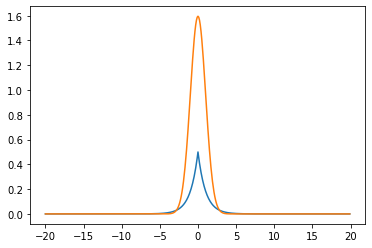

In [4]:
#Sampling Distribution and Unnormalised Target Distribution plotted
M=4
x_vals = np.arange(-20,20,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals,0,1) 

plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.show()

### Metropolis-Hastings Algorithm

In [5]:
def metropolis(N,s):
    samples = [np.random.rand()]
    num_accept = 0

    for i in range(N):
        #sample candidate from normal distribution
        candidate = np.random.normal(samples[-1], s)
        log_r = np.log(f(candidate)) - np.log(f(samples[-1]))
        log_u = np.log(np.random.rand())
        
        #calculate acceptance probability
        prob = min(np.log(1),log_r)
    
        #accept with the calculated probability
        if log_u < prob:
            samples.append(candidate)
            num_accept += 1
        
        #otherwise report current sample again
        else:
            samples.append(samples[-1])

    return samples

### (a) Apply the random walk Metropolis algorithm using N = 10000 and s = 1. Use the generated samples (x1, . . . xN ) to construct a histogram and a kernel density plot in the same figure. 

Note that these provide estimates of f(x).

### Overlay a graph of f(x) on this figure to visualise the quality of these estimates. Also, report the sample mean and standard deviation of the generated samples 

(Note: these are also known as the Monte Carlo estimates of the mean and standard deviation respectively).

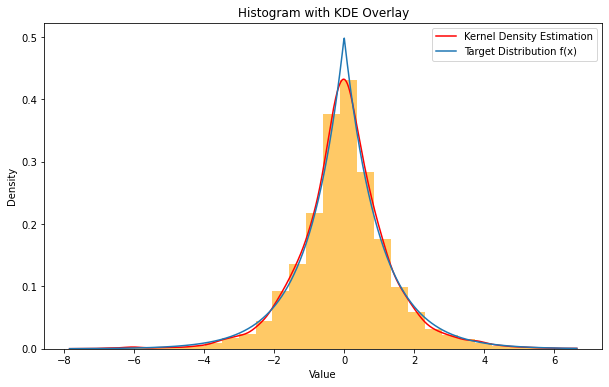

In [6]:
#defining total proposed samples and standard deviation
N=10000
s=1 

#retained samples 
samples = np.array(metropolis(N,s))

#Plot size
plt.figure(figsize=(10,6))

# Plot the histogram
plt.hist(samples, bins=30, density=True, alpha=0.6, color='orange')
# Perform Kernel Density Estimation
kde = gaussian_kde(samples)
x_range = np.linspace(samples.min(), samples.max(), 1000)
kde_values = kde(x_range)

# Plot the KDE
plt.plot(x_range, kde_values, color='r', label="Kernel Density Estimation")

#Plot f(x)
f_values = [f(x) for x in x_range]
plt.plot(x_range,f_values,label="Target Distribution f(x)")

# Add labels, title and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram with KDE Overlay')
plt.legend()


# Display the plot
plt.show()

In [7]:
print(len(samples))

10001


In [8]:
print("Sample Mean: %s" % np.mean(samples))

Sample Mean: -0.0073554676426738205


In [9]:
print("Sample Standard Deviation: %s" % np.std(samples))

Sample Standard Deviation: 1.3456413045243376


### (b) The operations in part 1(a) are based on the assumption that the algorithm has converged. One of the most widely used convergence diagnostics is the so-called $\bar{R}$ value. In order to obtain a valued of this diagnostic, you need to apply the procedure below:

### i) Generate more than one sequence of $x_0, . . . , x_N$, potentially using different initial values $x_0$. Denote each of these sequences, also known as chains, by $(x^j_0, x^j_1, ... , x^j_N)$ for $j = 1, 2, . . . , J$

In [10]:
s = 0.001 
J = 4
N = 2000
sequences = []

for i in range(J):
    sample = metropolis(N,s)
    sequences.append(sample)

### ii) Define and compute $M_j$ as the sample mean of chain and $V_j$ as the within sample variance of chain $j$

In [11]:
Mj = [np.mean(sequences[i]) for i in range(J)]
Vj = [np.var(sequences[i]) for i in range(J)]

### iii) Define and compute the overall within sample variance W

In [12]:
W = np.mean(Vj)

### iv) Define and compute the overall sample mean $M$ and the between sample variance $B$

In [13]:
M = np.mean(Mj)
B = N * np.var(Mj)

### v) Compute the $ \hat{R} $ value

In [14]:
var_hat = ((N -1)/N) * W + (B/N)

R_hat = np.sqrt(var_hat / W)

In [15]:
R_hat

14.399452006423802

In [16]:
def r_hat(s):
    J = 4
    N = 2000
    sequences = []

    for i in range(J):
        sample = metropolis(N,s)
        sequences.append(sample)

    Mj = [np.mean(sequences[i]) for i in range(J)]
    Vj = [np.var(sequences[i]) for i in range(J)]

    W = np.mean(Vj)

    M = np.mean(Mj)
    B = N * np.var(Mj)

    var_hat = ((N -1)/N) * W + (B/N)
    R_hat = np.sqrt(var_hat / W)
    return R_hat

###  Keeping N and J fixed, provide a plot of the values of $\hat{R}$ over a grid of $s$ values in the interval between 0.001 and 1.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


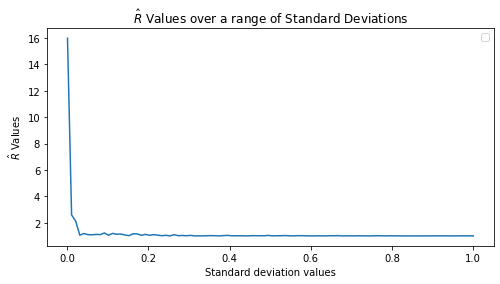

In [17]:
s_vals = np.linspace(0.001,1,100)
r_vals = [r_hat(s) for s in s_vals]

plt.figure(figsize=(8,4))
plt.plot(s_vals,r_vals)
plt.legend()

plt.xlabel('Standard deviation values')
plt.ylabel('$\hat{R}$ Values')
plt.title("$\hat{R}$ Values over a range of Standard Deviations")
plt.show()